# 第5章 Logistic回归

## Logistic 回归 概述

`Logistic 回归虽然名字叫回归，但是它是用来做分类的。其主要思想是: 根据现有数据对分类边界线建立回归公式，以此进行分类。`

## 须知概念

### Sigmoid 函数

#### 回归 概念

假设现在有一些数据点，我们用一条直线对这些点进行拟合（这条直线称为最佳拟合直线），这个拟合的过程就叫做回归。进而可以得到对这些点的拟合直线方程，那么我们根据这个回归方程，怎么进行分类呢？请看下面。

#### 二值型输出分类函数

我们想要的函数应该是: 能接受所有的输入然后预测出类别。例如，在两个类的情况下，上述函数输出 0 或 1.或许你之前接触过具有这种性质的函数，该函数称为 `海维塞得阶跃函数(Heaviside step function)`，或者直接称为 `单位阶跃函数`。然而，海维塞得阶跃函数的问题在于: 该函数在跳跃点上从 0 瞬间跳跃到 1，这个瞬间跳跃过程有时很难处理。幸好，另一个函数也有类似的性质（可以输出 0 或者 1 的性质），且数学上更易处理，这就是 Sigmoid 函数。 Sigmoid 函数具体的计算公式如下: 

![Sigmoid 函数计算公式](../../../images/5.Logistic/LR_1.png)

下图给出了 Sigmoid 函数在不同坐标尺度下的两条曲线图。当 x 为 0 时，Sigmoid 函数值为 0.5 。随着 x 的增大，对应的 Sigmoid 值将逼近于 1 ; 而随着 x 的减小， Sigmoid 值将逼近于 0 。如果横坐标刻度足够大， Sigmoid 函数看起来很像一个阶跃函数。

![Sigmoid 函数在不同坐标下的图片](../../../images/5.Logistic/LR_3.png)

因此，为了实现 Logistic 回归分类器，我们可以在每个特征上都乘以一个回归系数（如下公式所示），然后把所有结果值相加，将这个总和代入 Sigmoid 函数中，进而得到一个范围在 0~1 之间的数值。任何大于 0.5 的数据被分入 1 类，小于 0.5 即被归入 0 类。所以， Logistic 回归也可以被看成是一种概率估计。

### 基于最优化方法的回归系数确定

Sigmoid 函数的输入记为 z ，由下面公式得到: 

$$z = w_0 x_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

如果采用向量的写法，上述公式可以写成 $$z = w_{}^{T} x$$ ，它表示将这两个数值向量对应元素相乘然后全部加起来即得到 z 值。其中的向量 x 是分类器的输入数据，向量 w 也就是我们要找到的最佳参数（系数），从而使得分类器尽可能地精确。为了寻找该最佳参数，需要用到最优化理论的一些知识。我们这里使用的是——梯度上升法。


### 梯度上升法

#### 梯度的介绍
需要一点点向量方面的数学基础

```
向量 = 值 + 方向  
梯度 = 向量
梯度 = 梯度值 + 梯度方向
```

#### 梯度上升法的思想
要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度记为 ▽ ，则函数 f(x, y) 的梯度由下式表示: 

![梯度上升计算公式](../../../images/5.Logistic/LR_5.png)

这个梯度意味着要沿 x 的方向移动 ![f(x, y)对x求偏导](../../../images/5.Logistic/LR_6.png) ，沿 y 的方向移动 ![f(x, y)对y求偏导](../../../images/5.Logistic/LR_7.png) 。其中，函数f(x, y) 必须要在待计算的点上有定义并且可微。下图是一个具体的例子。

![梯度上升](../../../images/5.Logistic/LR_8.png)

上图展示的，梯度上升算法到达每个点后都会重新估计移动的方向。从 P0 开始，计算完该点的梯度，函数就根据梯度移动到下一点 P1。在 P1 点，梯度再次被重新计算，并沿着新的梯度方向移动到 P2 。如此循环迭代，直到满足停止条件。迭代过程中，梯度算子总是保证我们能选取到最佳的移动方向。

上图中的梯度上升算法沿梯度方向移动了一步。可以看到，梯度算子总是指向函数值增长最快的方向。这里所说的是移动方向，而未提到移动量的大小。该量值称为步长，记作 α 。用向量来表示的话，梯度上升算法的迭代公式如下: 

![梯度上升迭代公式](../../../images/5.Logistic/LR_9.png)

该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。


介绍一下几个相关的概念：
```
例如：y = w1x1 + w2x2 + ... + wnxn
梯度：参考上图的例子，二维图像，x方向代表第一个系数，也就是 w1，y方向代表第二个系数也就是 w2，这样的向量就是梯度。
α：上面的梯度算法的迭代公式中的阿尔法，这个代表的是移动步长。移动步长会影响最终结果的拟合程度，最好的方法就是随着迭代次数更改移动步长。
步长通俗的理解，100米，如果我一步走10米，我需要走10步；如果一步走20米，我只需要走5步。这里的一步走多少米就是步长的意思。
▽f(w)：代表沿着梯度变化的方向。
```

**Note:** 我们常听到的是梯度下降算法，它与这里的梯度上升算法是一样的，只是公式中的加法需要变成减法。因此，对应的公式可以写成

![梯度下降迭代公式](../../../images/5.Logistic/LR_10.png)

梯度上升算法用来求函数的最大值，而梯度下降算法用来求函数的最小值。

**局部最优现象**

![梯度下降图_4](../../../images/5.Logistic/LR_20.png)

上图表示参数 θ 与误差函数 J(θ) 的关系图，红色的部分是表示 J(θ) 有着比较高的取值，我们需要的是，能够让 J(θ) 的值尽量的低。也就是深蓝色的部分。θ0，θ1 表示 θ 向量的两个维度。

可能梯度下降的最终点并非是全局最小点，可能是一个局部最小点，如我们上图中的右边的梯度下降曲线，描述的是最终到达一个局部最小点，这是我们重新选择了一个初始点得到的。

看来我们这个算法将会在很大的程度上被初始点的选择影响而陷入局部最小点。

## Logistic 回归 原理

### Logistic 回归 工作原理

```
每个回归系数初始化为 1
重复 R 次:
    计算整个数据集的梯度
    使用 步长 x 梯度 更新回归系数的向量
返回回归系数
```

### Logistic 回归 开发流程

```
收集数据: 采用任意方法收集数据
准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
分析数据: 采用任意方法对数据进行分析。
训练算法: 大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
测试算法: 一旦训练步骤完成，分类将会很快。
使用算法: 首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。
```

### Logistic 回归 算法特点

```
优点: 计算代价不高，易于理解和实现。
缺点: 容易欠拟合，分类精度可能不高。
适用数据类型: 数值型和标称型数据。
```

### 附加 方向导数与梯度

![方向导数与梯度](../../../images/5.Logistic/方向导数和梯度.png)

## 例子：使用 Logistic 回归在简单数据集上的分类

In [34]:
import matplotlib.pyplot as plt

In [35]:
def loadDataSet(file_name):
    # dataMat为原始数据， labelMat为原始数据的标签
    dataMat = []; labelMat = []
    fr = open(file_name)
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [36]:
dataMat, labelMat = loadDataSet("../../../input/5.Logistic/TestSet.txt")

In [37]:
dataMat

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862],
 [1.0, -1.322371, 7.152853],
 [1.0, 0.423363, 11.054677],
 [1.0, 0.406704, 7.067335],
 [1.0, 0.667394, 12.741452],
 [1.0, -2.46015, 6.866805],
 [1.0, 0.569411, 9.548755],
 [1.0, -0.026632, 10.427743],
 [1.0, 0.850433, 6.920334],
 [1.0, 1.347183, 13.1755],
 [1.0, 1.176813, 3.16702],
 [1.0, -1.781871, 9.097953],
 [1.0, -0.566606, 5.749003],
 [1.0, 0.931635, 1.589505],
 [1.0, -0.024205, 6.151823],
 [1.0, -0.036453, 2.690988],
 [1.0, -0.196949, 0.444165],
 [1.0, 1.014459, 5.754399],
 [1.0, 1.985298, 3.230619],
 [1.0, -1.693453, -0.55754],
 [1.0, -0.576525, 11.778922],
 [1.0, -0.346811, -1.67873],
 [1.0, -2.124484, 2.672471],
 [1.0, 1.217916, 9.597015],
 [1.0, -0.733928, 9.098687],
 [1.0, -3.642001, -1.618087],
 [1.0, 0.315985, 3.523953],
 [1.0, 1.416614, 9.619232],
 [1.0, -0.386323, 3.989286],
 [1.0, 0.556921, 8.294984],
 [1.0, 1.224863, 11.58736],
 [1.0, -1.347803, -2.406051],
 [1.0, 1.196604, 4.951851]

In [38]:
labelMat

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0]

In [39]:
def sigmoid(inX):
    return 1.0/(1 + np.exp(-inX))

In [40]:
def gradAscent(dataMatIn, classLabels):
    '''
    Desc:
        正常的梯度上升法
    Args:
        dataMatIn -- 输入的 数据的特征 List
        classLabels -- 输入的数据的类别标签
    Returns:
        array(weights) -- 得到的最佳回归系数
    '''
    dataMatrix = np.mat(dataMatIn)             # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = np.mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m, n = np.shape(dataMatrix)
    
    # alpha代表向目标移动的步长
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)     # 矩阵乘法
        error = (labelMat - h)              # 向量相减
        weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数
    
    return array(weights)

In [41]:
def stocGradAscent0(dataMatrix, classLabels):
    '''
    Desc:
        随机梯度上升，只使用一个样本点来更新回归系数
    Args:
        dataMatrix -- 输入数据的数据特征（除去最后一列）
        classLabels -- 输入数据的类别标签（最后一列数据）
    Returns:
        weights -- 得到的最佳回归系数
    '''
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i] * weights))
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        
        print weights, "*"*10 , dataMatrix[i], "*"*10 , error
        weights = weights + alpha * error * dataMatrix[i]
        
    return weights

In [42]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    '''
    Desc:
        改进版的随机梯度上升，使用随机的一个样本来更新回归系数
    Args:
        dataMatrix -- 输入数据的数据特征（除去最后一列数据）
        classLabels -- 输入数据的类别标签（最后一列数据）
        numIter=150 --  迭代次数
    Returns:
        weights -- 得到的最佳回归系数
    '''
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = range(m)
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4 / (1.0+j+i) + 0.0001    # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])

    return weights

In [47]:
def plotBestFit(dataArr, labelMat, weights):
    '''
        Desc:
            将我们得到的数据可视化展示出来
        Args:
            dataArr:样本数据的特征
            labelMat:样本数据的类别标签，即目标变量
            weights:回归系数
        Returns:
            None
    '''
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻，x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()

In [48]:
dataArr = np.array(dataMat)

In [54]:
weights = stocGradAscent1(dataArr, labelMat)
weights

array([ 13.699943 ,   0.8446058,  -1.7930659])

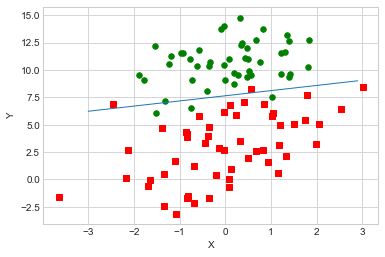

In [55]:
plotBestFit(dataArr, labelMat, weights)

## sklearn demo

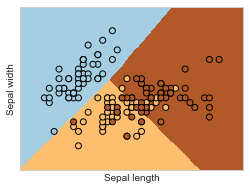

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# 引入一些数据来玩
iris = datasets.load_iris()
# 我们只采用样本数据的前两个feature
X = iris.data[:, :2]  
Y = iris.target

h = .02  # 网格中的步长

logreg = linear_model.LogisticRegression(C=1e5)

# 我们创建了一个 Neighbours Classifier 的实例，并拟合数据。
logreg.fit(X, Y)

# 绘制决策边界。为此我们将为网格 [x_min, x_max]x[y_min, y_max] 中的每个点分配一个颜色。
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# 将结果放入彩色图中
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 将训练点也同样放入彩色图中
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 参考资源

- [Logistic Regression 模型简介](https://tech.meituan.com/intro_to_logistic_regression.html)